In [76]:
import pandas  as pd
import seaborn as sns

import category_encoders as ce
from sklearn.model_selection import  GridSearchCV, train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score,  recall_score


from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

In [316]:
data = pd.read_csv('C:\\Users\\Renz\\Desktop\\Data Science\\Python stuff\\Titanic Dataset\\train.csv', index_col = 'PassengerId')
test = pd.read_csv('C:\\Users\\Renz\\Desktop\\Data Science\\Python stuff\\Titanic Dataset\\test.csv',index_col = 'PassengerId')

In [3]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [5]:
#fill missing  values:
#age:
data['Age'].fillna(data['Age'].mean(), inplace = True)
#fare(test): (fill with average of class)
#df['Fare'].fillna(13.302889,  inplace = True)
#cabin as is, assume  NaNs have no cabin LUL
#embarked with most frequent:
data['Embarked'].fillna(data['Embarked'].value_counts().index[0],  inplace = True)

# Feature  Engineering

In [6]:
#Getting prefix  from  names  
data['Name'] = (data['Name'].str.split(',',  n =1, expand=True))[1]
data['Name'] = (data['Name'].str.split('.',  n =1, expand=True))[0]

In [7]:
#getting num cols  easily:
num_cols  = list(data.describe().columns)
obj_cols = [x  for  x in data.columns if data[x].dtype  == 'object']
obj_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [8]:
#drop  ticket column,  i feel its  irrelevant and whatever trend it shows is  coincidence.
data  = data.drop('Ticket',  axis =1)
#data

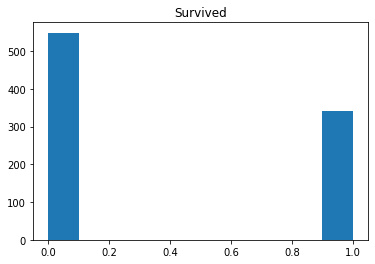

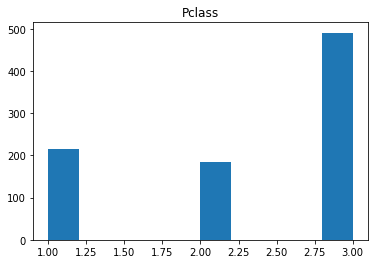

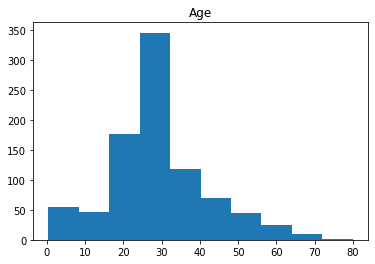

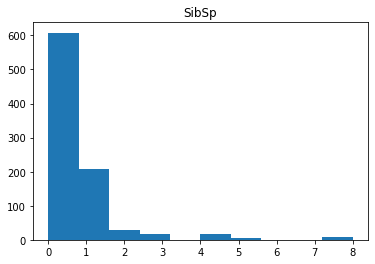

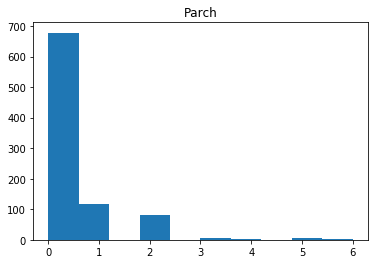

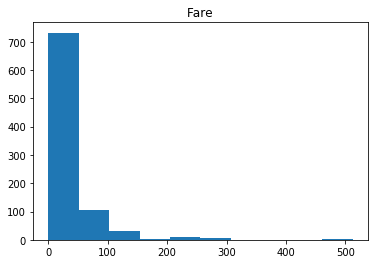

In [9]:
#histograms for numerical columns
for n  in  num_cols:
    try:
        plt.hist(data[n])
        plt.title(n)
        plt.show()
    except:
        pass
    

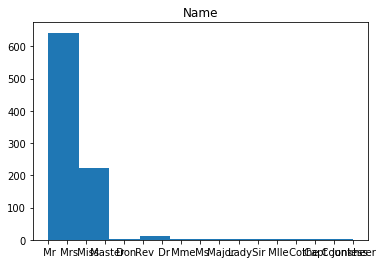

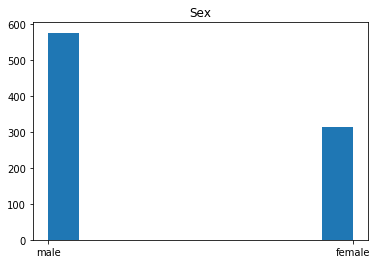

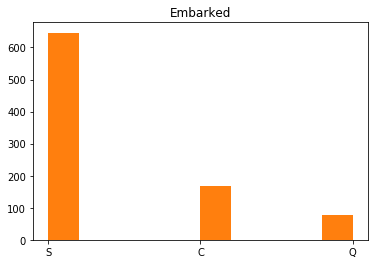

In [10]:
#cat columns histogram
for n  in obj_cols:
    try:
        plt.hist(data[n])
        plt.title(n)
        plt.show()
    except:
        pass

TO DO:

1. SibSp, Parch, Fare are  skewed. Log transform

2. Count encode prefixed

3. OHE  sex  and embarked

4. Cabin  Map

In [11]:
# count encode names (worse scores)
#countenc =  ce.CountEncoder(cols=['Name'])
#df = countenc.fit_transform(df)
#df.head()

In [12]:
#getting  dummies of  sex and  embarked and name
data  = pd.get_dummies(data,  columns= ['Sex','Embarked','Name'])
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,...,Name_ Master,Name_ Miss,Name_ Mlle,Name_ Mme,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,NaN,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,38.000000,1,0,71.2833,C85,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,3,26.000000,0,0,7.9250,NaN,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,35.000000,1,0,53.1000,C123,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,3,35.000000,0,0,8.0500,NaN,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,NaN,0,1,0,...,0,0,0,0,0,0,0,1,0,0
888,1,1,19.000000,0,0,30.0000,B42,1,0,0,...,0,1,0,0,0,0,0,0,0,0
889,0,3,29.699118,1,2,23.4500,NaN,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
#get first letter of  existing  and check class levels:
data['Cabin'] = data['Cabin'].str[0:1]
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,...,Name_ Master,Name_ Miss,Name_ Mlle,Name_ Mme,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,NaN,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,38.000000,1,0,71.2833,C,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,3,26.000000,0,0,7.9250,NaN,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,35.000000,1,0,53.1000,C,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,3,35.000000,0,0,8.0500,NaN,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,NaN,0,1,0,...,0,0,0,0,0,0,0,1,0,0
888,1,1,19.000000,0,0,30.0000,B,1,0,0,...,0,1,0,0,0,0,0,0,0,0
889,0,3,29.699118,1,2,23.4500,NaN,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
data['Cabin'].fillna('U',  inplace = True)

In [15]:
classXcabin = data.groupby(['Pclass','Cabin']).Fare.count()
classXcabin

Pclass  Cabin
1       A         15
        B         47
        C         59
        D         29
        E         25
        T          1
        U         40
2       D          4
        E          4
        F          8
        U        168
3       E          3
        F          5
        G          4
        U        479
Name: Fare, dtype: int64

In [16]:
#map cabin values
cabinValues = {'U':0,'G':1,'F':2, 'E':3,'D':4,'T':5,'C':6,'B':7,'A':8}
data['Cabin'] = data['Cabin'].map(cabinValues)

In [17]:
X = data[list(data.columns)].iloc[:,1:]
y = data['Survived']

In [18]:
#standard scale age (worse score)
#ct = ColumnTransformer([('age', StandardScaler(),['Age'])], remainder = 'passthrough')
#df['Age'] = ct.fit_transform(df)
#df.head()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, stratify = y, random_state = 42)

In [20]:
scores = pd.DataFrame(index = ['SGD','LR','KNN', 'GNB', 'XGB','RFC','DTC','ADA','XTC','GBC'])

In [21]:
def ModelScores(X_train, X_test, y_train, y_test, suffix, scores):
    '''Returns the score dataframe given joined with the results of model testing of a new dataset provided'''
    models =[['SGD', SGDClassifier(random_state= 42)],
             ['LR', LogisticRegression(random_state= 42)],
             ['KNN', KNeighborsClassifier()], 
             ['GNB', GaussianNB()], 
             ['XGB', XGBClassifier(random_state= 42)],
             ['RFC', RandomForestClassifier(random_state= 42)],
             ['DTC', DecisionTreeClassifier(random_state= 42)],
             ['ADA', AdaBoostClassifier(random_state= 42)],
             ['XTC', ExtraTreesClassifier(random_state= 42)],
             ['GBC', GradientBoostingClassifier(random_state= 42)]]
    Model = [x[0] for x in models]
    table = {'Accuracy'+suffix :[],
             'Recall'+suffix : []}
    for name, model in models:
        model.fit(X_train, y_train)
        preds  =  model.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        recall = recall_score(y_test, preds)
        table['Accuracy'+suffix].append(accuracy)
        table['Recall'+suffix].append(recall)
        msg = '%s : P = %f, R = %f' % (name, accuracy, recall)
        print(msg)
    df = pd.DataFrame(table, index = Model)
    scores = scores.join(df)
    return scores

In [22]:
scores = ModelScores(X_train, X_test, y_train, y_test,'', scores)

SGD : P = 0.625698, R = 0.043478
LR : P = 0.837989, R = 0.768116
KNN : P = 0.681564, R = 0.507246
GNB : P = 0.726257, R = 0.420290
XGB : P = 0.793296, R = 0.652174


C:\Users\Renz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFC : P = 0.804469, R = 0.695652
DTC : P = 0.793296, R = 0.753623
ADA : P = 0.765363, R = 0.710145
XTC : P = 0.776536, R = 0.695652
GBC : P = 0.810056, R = 0.666667


In [23]:
scores.describe()

,Accuracy,Recall
count,10.000000,10.000000
mean,0.761453,0.591304
std,0.065312,0.220937
min,0.625698,0.043478
25%,0.736034,0.543478
50%,0.784916,0.681159
75%,0.801676,0.706522
max,0.837989,0.768116


# Feature Selection

In [24]:
#feature selection with correl table
feature_corr =  pd.DataFrame(data.corr()['Survived']).sort_values(by = ['Survived'], ascending = False)
feature_corr

,Survived
Survived,1.000000
Sex_female,0.543351
Name_ Mrs,0.339040
Name_ Miss,0.327093
Cabin,0.284058
Fare,0.257307
Embarked_C,0.168240
Name_ Master,0.085221
Parch,0.081629
Name_ Mlle,0.060095


In [25]:
feature_corr =list(feature_corr[(feature_corr > 0.3)|(feature_corr < -0.3)].dropna(axis = 0).index)

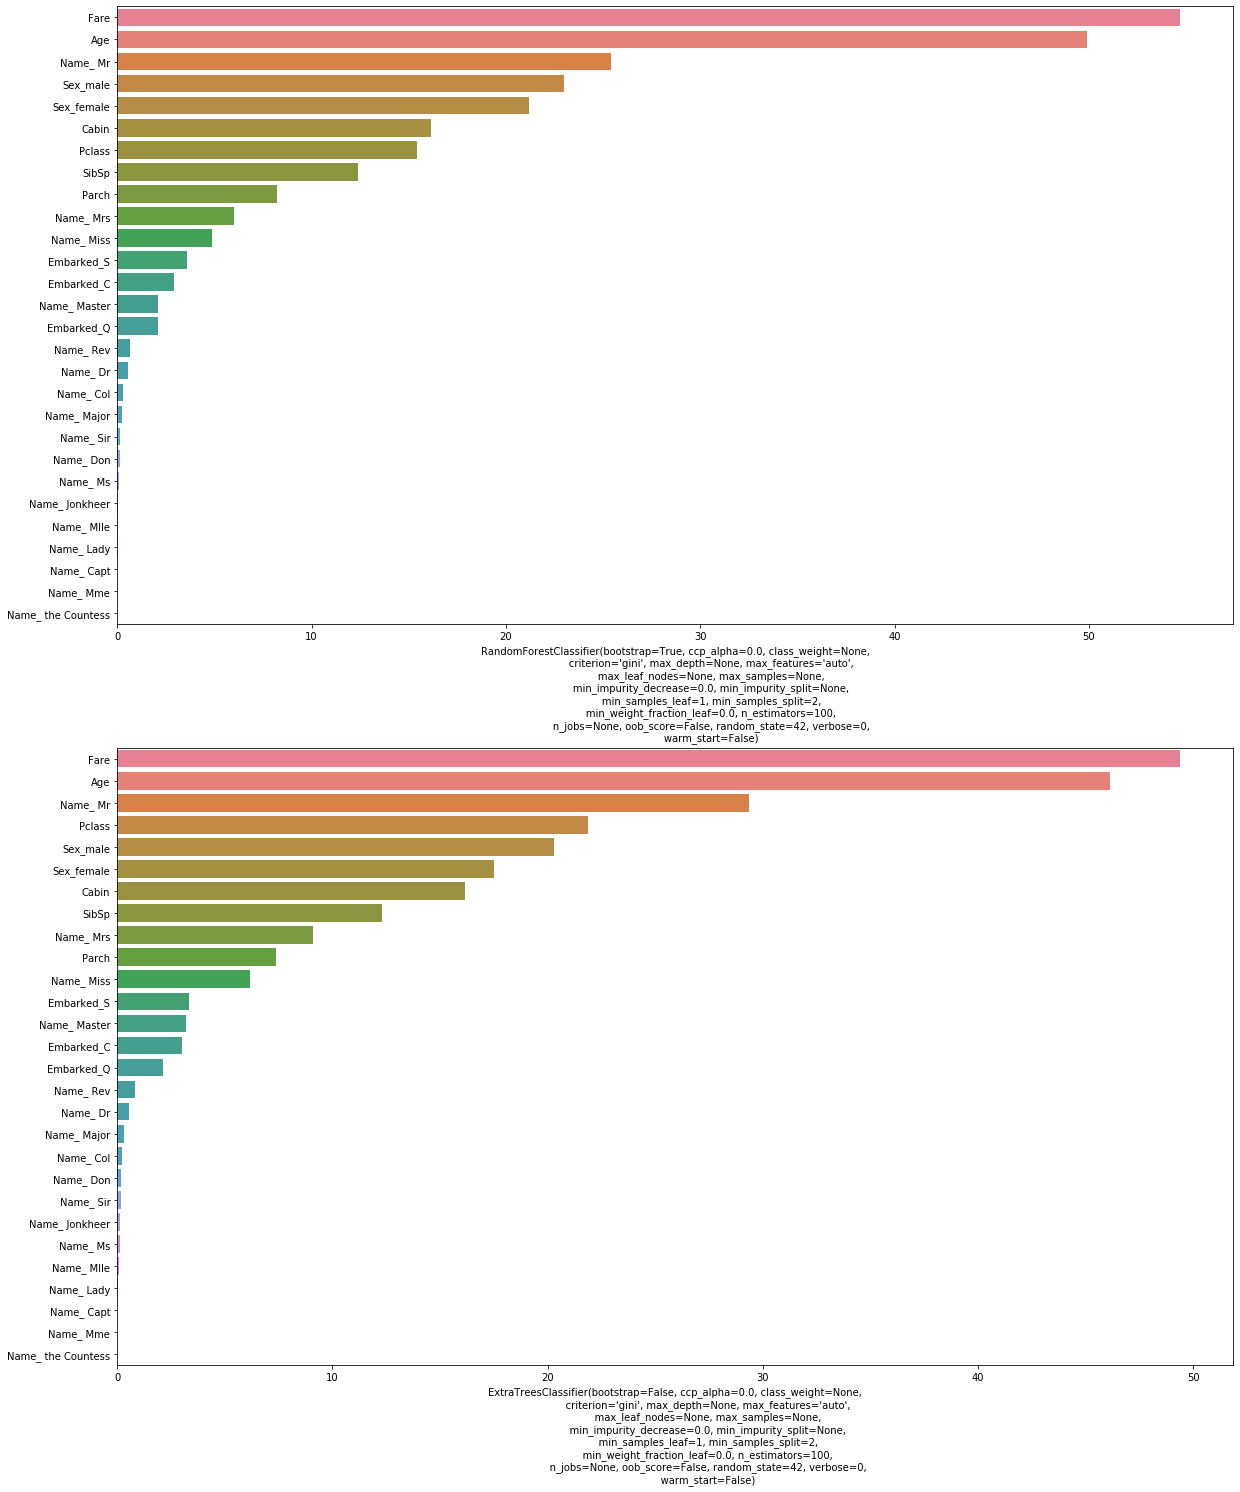

In [26]:
#feature selection with feature importances rfr and xtc
rfc_fi_test = RandomForestClassifier(random_state=42)
rfc_fi_test.fit(X_train, y_train) #fitting models with a training split to avoid overfitting
xtc_fi_test = ExtraTreesClassifier(random_state=42)
xtc_fi_test.fit(X_train, y_train)

fig = plt.figure(figsize = (20,25))
models_fi = [rfc_fi_test, xtc_fi_test]
for model in models_fi:
    fi = model.feature_importances_
    fi = (fi/np.argmax(fi)) * 1000
    order  =  np.argsort(fi)
    fig.add_subplot(2,1, models_fi.index(model) +1)
    sns.barplot(x = fi, y = X_train.columns, order = [X_train.columns[x] for x in order][::-1],palette='husl')
    plt.xlabel(model)

In [27]:
data_fscorr = data[feature_corr]
Xfsc = data_fscorr.drop(columns = 'Survived')
yfsc = data_fscorr.Survived 

In [28]:
X_trfsc, X_tefsc, y_trfsc, y_tefsc = train_test_split(Xfsc,yfsc, train_size = 0.8, stratify = yfsc, random_state = 42)

In [29]:
scores = ModelScores(X_trfsc, X_tefsc, y_trfsc, y_tefsc, '_fscorr', scores)

SGD : P = 0.765363, R = 0.666667
LR : P = 0.765363, R = 0.666667
KNN : P = 0.731844, R = 0.623188
GNB : P = 0.776536, R = 0.652174
XGB : P = 0.748603, R = 0.594203
RFC : P = 0.748603, R = 0.594203
DTC : P = 0.748603, R = 0.594203
ADA : P = 0.765363, R = 0.666667
XTC : P = 0.748603, R = 0.594203
GBC : P = 0.748603, R = 0.594203


In [30]:
scores.describe()

,Accuracy,Recall,Accuracy_fscorr,Recall_fscorr
count,10.000000,10.000000,10.000000,10.000000
mean,0.761453,0.591304,0.754749,0.624638
std,0.065312,0.220937,0.013022,0.034466
min,0.625698,0.043478,0.731844,0.594203
25%,0.736034,0.543478,0.748603,0.594203
50%,0.784916,0.681159,0.748603,0.608696
75%,0.801676,0.706522,0.765363,0.663043
max,0.837989,0.768116,0.776536,0.666667


In [31]:
feature_trees1 = ['Fare',
 'Age',
 'Name_ Mr',
 'Pclass',
 'Sex_male',
 'Sex_female',
 'Cabin',
 'SibSp',
 'Name_ Mrs',
 'Parch',
 'Name_ Miss',
 #'Embarked_S',
 #'Name_ Master',
 #'Embarked_C',
 #'Embarked_Q',
 #'Name_ Rev',
 #'Name_ Dr',
 #'Name_ Major',
 #'Name_ Col',
 #'Name_ Don',
 #'Name_ Sir',
 #'Name_ Jonkheer',
 #'Name_ Ms',
 #'Name_ Mlle',
 #'Name_ Lady',
 #'Name_ Capt',
 #'Name_ Mme',
 #'Name_ the Countess'
  'Survived'
         ]

In [32]:
data_fst1 = data[feature_trees1]
Xfst = data_fst1.drop(columns = 'Survived')
yfst = data_fst1.Survived 

In [33]:
X_trfst, X_tefst, y_trfst, y_tefst = train_test_split(Xfst,yfst, train_size = 0.8, stratify = yfst, random_state = 42)

In [34]:
scores = ModelScores(X_trfst, X_tefst, y_trfst, y_tefst, '_fst', scores)

SGD : P = 0.720670, R = 0.623188
LR : P = 0.821229, R = 0.724638
KNN : P = 0.664804, R = 0.492754
GNB : P = 0.787709, R = 0.724638
XGB : P = 0.787709, R = 0.652174


C:\Users\Renz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFC : P = 0.821229, R = 0.739130
DTC : P = 0.810056, R = 0.753623
ADA : P = 0.776536, R = 0.724638
XTC : P = 0.798883, R = 0.739130
GBC : P = 0.793296, R = 0.637681


In [35]:
scores.describe()

,Accuracy,Recall,Accuracy_fscorr,Recall_fscorr,Accuracy_fst,Recall_fst
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.761453,0.591304,0.754749,0.624638,0.778212,0.681159
std,0.065312,0.220937,0.013022,0.034466,0.049132,0.081125
min,0.625698,0.043478,0.731844,0.594203,0.664804,0.492754
25%,0.736034,0.543478,0.748603,0.594203,0.779330,0.641304
50%,0.784916,0.681159,0.748603,0.608696,0.790503,0.724638
75%,0.801676,0.706522,0.765363,0.663043,0.807263,0.735507
max,0.837989,0.768116,0.776536,0.666667,0.821229,0.753623


Best score fst1 dataset, lets play with that onwards.

In [36]:
data_fst1

,Fare,Age,Name_ Mr,Pclass,Sex_male,Sex_female,Cabin,SibSp,Name_ Mrs,Parch,Name_ Miss,Survived
PassengerId,,,,,,,,,,,,
1,7.2500,22.000000,1,3,1,0,0,1,0,0,0,0
2,71.2833,38.000000,0,1,0,1,6,1,1,0,0,1
3,7.9250,26.000000,0,3,0,1,0,0,0,0,1,1
4,53.1000,35.000000,0,1,0,1,6,1,1,0,0,1
5,8.0500,35.000000,1,3,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,13.0000,27.000000,0,2,1,0,0,0,0,0,0,0
888,30.0000,19.000000,0,1,0,1,7,0,0,0,1,1
889,23.4500,29.699118,0,3,0,1,0,1,0,2,1,0


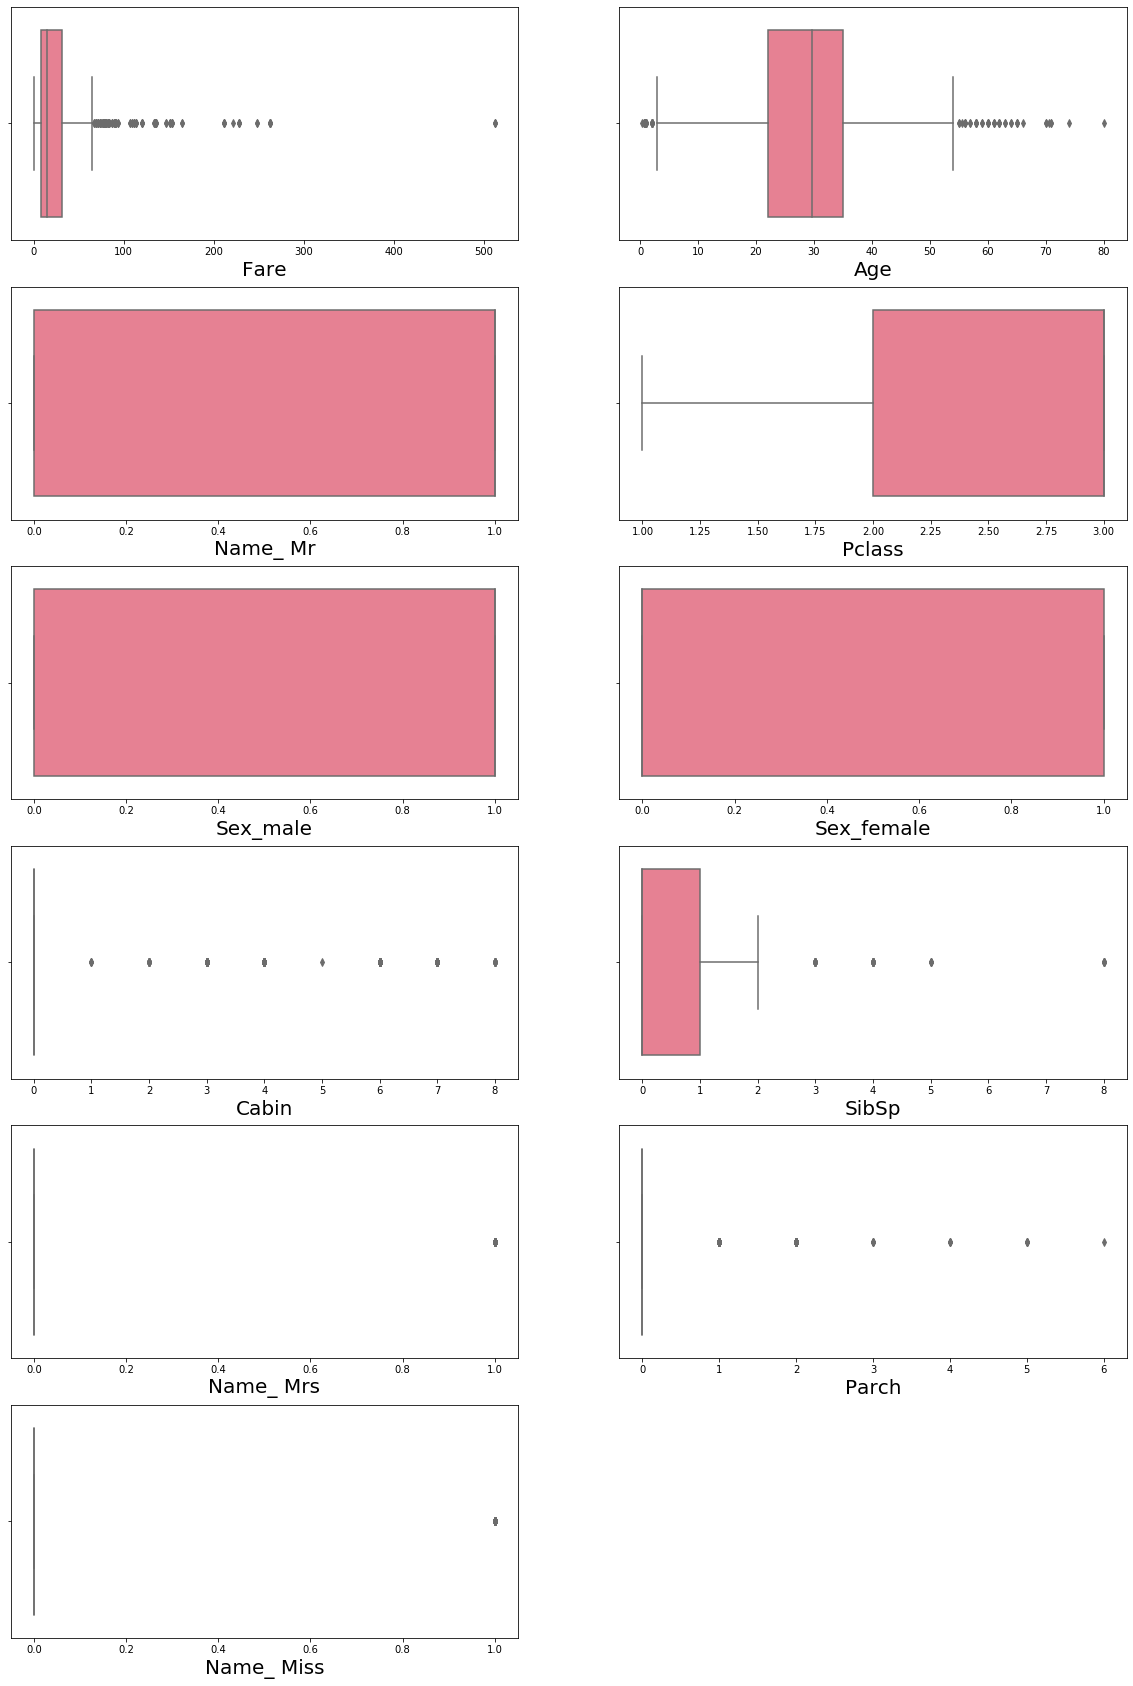

In [37]:
#check outliers  with boxplots
fig = plt.figure(figsize = (20,30))
column_list = list(data_fst1.drop(columns = 'Survived').columns)
for column in column_list:
    fig.add_subplot(6,2, column_list.index(column) +1)
    sns.boxplot(data_fst1[column], palette='husl')
    plt.xlabel(column, fontsize = 20)

Let's play  with outliers and see how removing them will affect model performance.

- Im being careful with this, I think I will remove the outliers from very important features and not the less important ones.

In [38]:
def RemoveOutlier(data, y, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 *IQR)
    data['Survived'] =  y
    data = data[filter]
    X = data.drop(columns = 'Survived')
    y = data.Survived
    return X, y

In [39]:
X_ageclean, y_ageclean = RemoveOutlier(X_trfst,  y_trfst, 'Age')

C:\Users\Renz\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [41]:
print('Lost %i outliers, new length of data: %i' % ((len(X_trfst)-len(X_ageclean), len(X_ageclean))))

Lost 29 outliers, new length of data: 683


In [43]:
scores = ModelScores(X_ageclean, X_tefst, y_ageclean, y_tefst, '_ageclean', scores)

SGD : P = 0.737430, R = 0.826087
LR : P = 0.826816, R = 0.739130
KNN : P = 0.659218, R = 0.492754
GNB : P = 0.782123, R = 0.739130
XGB : P = 0.793296, R = 0.652174


C:\Users\Renz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFC : P = 0.815642, R = 0.710145
DTC : P = 0.765363, R = 0.710145
ADA : P = 0.759777, R = 0.652174
XTC : P = 0.810056, R = 0.739130
GBC : P = 0.776536, R = 0.594203


In [44]:
scores.describe()

,Accuracy,Recall,Accuracy_fscorr,Recall_fscorr,Accuracy_fst,Recall_fst,Accuracy_ageclean,Recall_ageclean
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.761453,0.591304,0.754749,0.624638,0.778212,0.681159,0.772626,0.685507
std,0.065312,0.220937,0.013022,0.034466,0.049132,0.081125,0.048349,0.092686
min,0.625698,0.043478,0.731844,0.594203,0.664804,0.492754,0.659218,0.492754
25%,0.736034,0.543478,0.748603,0.594203,0.779330,0.641304,0.761173,0.652174
50%,0.784916,0.681159,0.748603,0.608696,0.790503,0.724638,0.779330,0.710145
75%,0.801676,0.706522,0.765363,0.663043,0.807263,0.735507,0.805866,0.739130
max,0.837989,0.768116,0.776536,0.666667,0.821229,0.753623,0.826816,0.826087


Worse scores, not doing this.

In [46]:
X_fareclean, y_fareclean = RemoveOutlier(X_trfst,  y_trfst, 'Fare')

C:\Users\Renz\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [47]:
print('Lost %i outliers, new length of data: %i' % ((len(X_trfst)-len(X_fareclean), len(X_fareclean))))

Lost 91 outliers, new length of data: 621


In [49]:
scores = ModelScores(X_fareclean, X_tefst, y_fareclean, y_tefst, '_fareclean', scores)

SGD : P = 0.648045, R = 0.188406
LR : P = 0.776536, R = 0.724638
KNN : P = 0.664804, R = 0.507246
GNB : P = 0.765363, R = 0.768116
XGB : P = 0.782123, R = 0.637681


C:\Users\Renz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFC : P = 0.810056, R = 0.695652
DTC : P = 0.765363, R = 0.681159
ADA : P = 0.731844, R = 0.652174
XTC : P = 0.776536, R = 0.681159
GBC : P = 0.765363, R = 0.608696


In [50]:
scores.describe()

,Accuracy,Recall,Accuracy_fscorr,Recall_fscorr,Accuracy_fst,Recall_fst,Accuracy_ageclean,Recall_ageclean,Accuracy_fareclean,Recall_fareclean
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.761453,0.591304,0.754749,0.624638,0.778212,0.681159,0.772626,0.685507,0.748603,0.614493
std,0.065312,0.220937,0.013022,0.034466,0.049132,0.081125,0.048349,0.092686,0.052407,0.165412
min,0.625698,0.043478,0.731844,0.594203,0.664804,0.492754,0.659218,0.492754,0.648045,0.188406
25%,0.736034,0.543478,0.748603,0.594203,0.779330,0.641304,0.761173,0.652174,0.740223,0.615942
50%,0.784916,0.681159,0.748603,0.608696,0.790503,0.724638,0.779330,0.710145,0.765363,0.666667
75%,0.801676,0.706522,0.765363,0.663043,0.807263,0.735507,0.805866,0.739130,0.776536,0.692029
max,0.837989,0.768116,0.776536,0.666667,0.821229,0.753623,0.826816,0.826087,0.810056,0.768116


Worse performance

In [51]:
X_cabclean, y_cabclean = RemoveOutlier(X_trfst,  y_trfst, 'Cabin')

C:\Users\Renz\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [55]:
print('Lost %i outliers, new length of data: %i' % ((len(X_trfst)-len(X_cabclean), len(X_cabclean))))

Lost 160 outliers, new length of data: 552


In [53]:
scores = ModelScores(X_cabclean, X_tefst, y_cabclean, y_tefst, '_cabclean', scores)

SGD : P = 0.709497, R = 0.289855
LR : P = 0.815642, R = 0.666667
KNN : P = 0.642458, R = 0.362319
GNB : P = 0.770950, R = 0.695652
XGB : P = 0.815642, R = 0.637681


C:\Users\Renz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFC : P = 0.826816, R = 0.681159
DTC : P = 0.787709, R = 0.652174
ADA : P = 0.770950, R = 0.579710
XTC : P = 0.810056, R = 0.681159
GBC : P = 0.798883, R = 0.608696


In [54]:
scores.describe()

,Accuracy,Recall,Accuracy_fscorr,Recall_fscorr,Accuracy_fst,Recall_fst,Accuracy_ageclean,Recall_ageclean,Accuracy_fareclean,Recall_fareclean,Accuracy_cabclean,Recall_cabclean
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.761453,0.591304,0.754749,0.624638,0.778212,0.681159,0.772626,0.685507,0.748603,0.614493,0.774860,0.585507
std,0.065312,0.220937,0.013022,0.034466,0.049132,0.081125,0.048349,0.092686,0.052407,0.165412,0.057581,0.142196
min,0.625698,0.043478,0.731844,0.594203,0.664804,0.492754,0.659218,0.492754,0.648045,0.188406,0.642458,0.289855
25%,0.736034,0.543478,0.748603,0.594203,0.779330,0.641304,0.761173,0.652174,0.740223,0.615942,0.770950,0.586957
50%,0.784916,0.681159,0.748603,0.608696,0.790503,0.724638,0.779330,0.710145,0.765363,0.666667,0.793296,0.644928
75%,0.801676,0.706522,0.765363,0.663043,0.807263,0.735507,0.805866,0.739130,0.776536,0.692029,0.814246,0.677536
max,0.837989,0.768116,0.776536,0.666667,0.821229,0.753623,0.826816,0.826087,0.810056,0.768116,0.826816,0.695652


Performance increase, but less training data. Lets stop there.


In [56]:
def GraphScores(data, agg):
    scores_aggregation = pd.DataFrame(data.describe())
    acc_cols = scores_aggregation.columns[scores_aggregation.columns.str.contains('Accuracy', na=False)]
    index_pivot = list(scores_aggregation.index)
    acc_table = pd.DataFrame(scores_aggregation.T,  index =  acc_cols)
    sns.set_style("darkgrid")
    plt.xticks(rotation = 90)
    return sns.lineplot(x  = list(acc_table.index),  y=acc_table[agg],  sort = False)

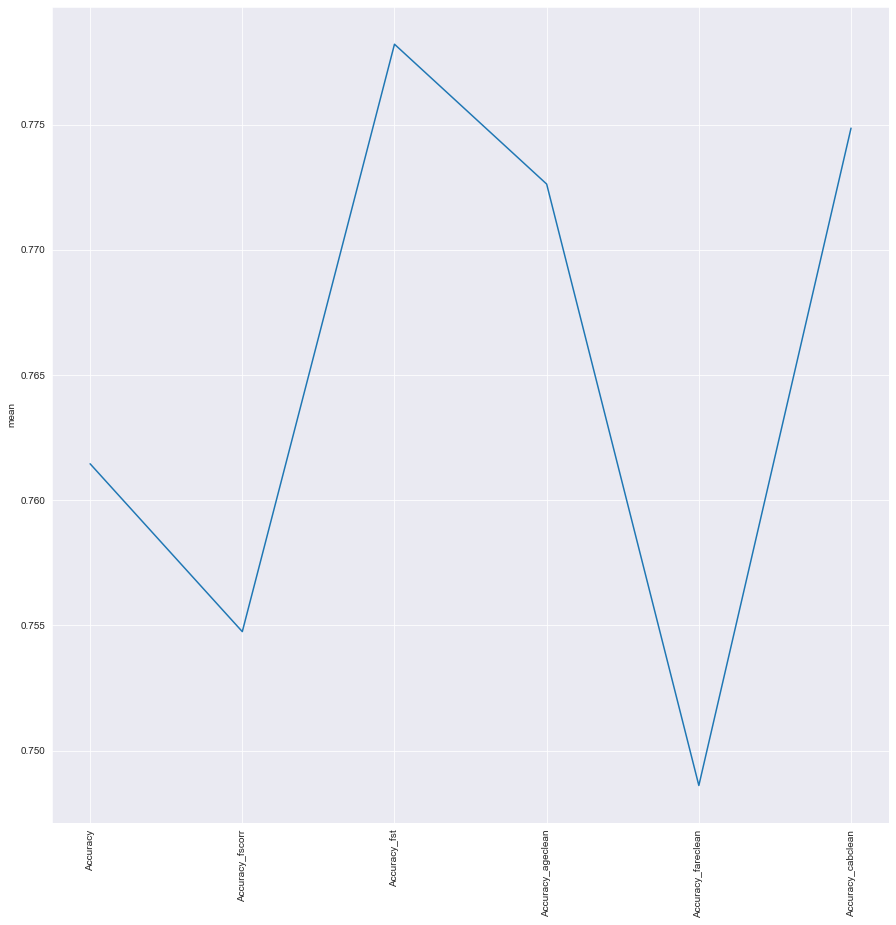

In [57]:
plt.figure(figsize= (15,15))
GraphScores(scores, 'mean')

Looks good, so far we've used:

- fst1 features

we're not sure how this will perform with new data. We'll see.

In [59]:
df_unscaled = data_fst1.copy()
y_final = df_unscaled.Survived

In [60]:
df_unscaled

,Fare,Age,Name_ Mr,Pclass,Sex_male,Sex_female,Cabin,SibSp,Name_ Mrs,Parch,Name_ Miss,Survived
PassengerId,,,,,,,,,,,,
1,7.2500,22.000000,1,3,1,0,0,1,0,0,0,0
2,71.2833,38.000000,0,1,0,1,6,1,1,0,0,1
3,7.9250,26.000000,0,3,0,1,0,0,0,0,1,1
4,53.1000,35.000000,0,1,0,1,6,1,1,0,0,1
5,8.0500,35.000000,1,3,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,13.0000,27.000000,0,2,1,0,0,0,0,0,0,0
888,30.0000,19.000000,0,1,0,1,7,0,0,0,1,1
889,23.4500,29.699118,0,3,0,1,0,1,0,2,1,0


In [62]:
def ModelScoresScaled(X_train, X_test, y_train, y_test,  suffix, scores):
    '''Returns the score dataframe given joined with the results of model testing of a new dataset provided'''
    models =[['SGD', SGDClassifier(random_state= 42)],
             ['LR', LogisticRegression(random_state= 42)],
             ['KNN', KNeighborsClassifier()], 
             ['GNB', GaussianNB()], 
             ['XGB', XGBClassifier(random_state= 42)],
             ['RFC', RandomForestClassifier(random_state= 42)],
             ['DTC', DecisionTreeClassifier(random_state= 42)],
             ['ADA', AdaBoostClassifier(random_state= 42)],
             ['XTC', ExtraTreesClassifier(random_state= 42)],
             ['GBC', GradientBoostingClassifier(random_state= 42)]]
    Model = [x[0] for x in models]
    table = {'Accuracy'+suffix :[],
             'Recall'+suffix : []}
    for name, model in models:
        model.fit(X_train, y_train)
        preds  =  model.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        recall = recall_score(y_test, preds)
        table['Accuracy'+suffix].append(accuracy)
        table['Recall'+suffix].append(recall)
        msg = '%s : P = %f, R = %f' % (name, accuracy, recall)
        print(msg)
    df = pd.DataFrame(table, index = Model)
    scores = scores.join(df)
    return scores

In [70]:
X_trss  = StandardScaler().fit_transform(X_trfst.drop(columns =  'Survived'))
X_tess  = StandardScaler().fit_transform(X_tefst)

In [71]:
scores = ModelScoresScaled(X_trss, X_tess, y_trfst, y_tefst, '_sscaler', scores)

SGD : P = 0.642458, R = 0.420290
LR : P = 0.821229, R = 0.724638
KNN : P = 0.765363, R = 0.623188
GNB : P = 0.776536, R = 0.695652
XGB : P = 0.787709, R = 0.565217
RFC : P = 0.731844, R = 0.666667
DTC : P = 0.737430, R = 0.710145
ADA : P = 0.776536, R = 0.724638
XTC : P = 0.759777, R = 0.710145
GBC : P = 0.787709, R = 0.565217


In [72]:
X_trmm  = MinMaxScaler().fit_transform(X_trfst.drop(columns =  'Survived'))
X_temm  = MinMaxScaler().fit_transform(X_tefst)

In [74]:
scores = ModelScoresScaled(X_trmm, X_temm, y_trfst, y_tefst, '_mmcaler', scores)

SGD : P = 0.804469, R = 0.768116
LR : P = 0.804469, R = 0.666667
KNN : P = 0.776536, R = 0.565217
GNB : P = 0.793296, R = 0.724638
XGB : P = 0.793296, R = 0.637681
RFC : P = 0.798883, R = 0.594203
DTC : P = 0.782123, R = 0.608696
ADA : P = 0.759777, R = 0.608696
XTC : P = 0.798883, R = 0.666667
GBC : P = 0.804469, R = 0.652174


In [77]:
X_trrs  = RobustScaler().fit_transform(X_trfst.drop(columns =  'Survived'))
X_ters  = RobustScaler().fit_transform(X_tefst)

In [78]:
scores = ModelScoresScaled(X_trrs, X_ters, y_trfst, y_tefst, '_rsscaler', scores)

SGD : P = 0.743017, R = 0.840580
LR : P = 0.815642, R = 0.710145
KNN : P = 0.804469, R = 0.652174
GNB : P = 0.787709, R = 0.710145
XGB : P = 0.804469, R = 0.681159
RFC : P = 0.787709, R = 0.623188
DTC : P = 0.698324, R = 0.608696
ADA : P = 0.681564, R = 0.652174
XTC : P = 0.787709, R = 0.652174
GBC : P = 0.715084, R = 0.623188


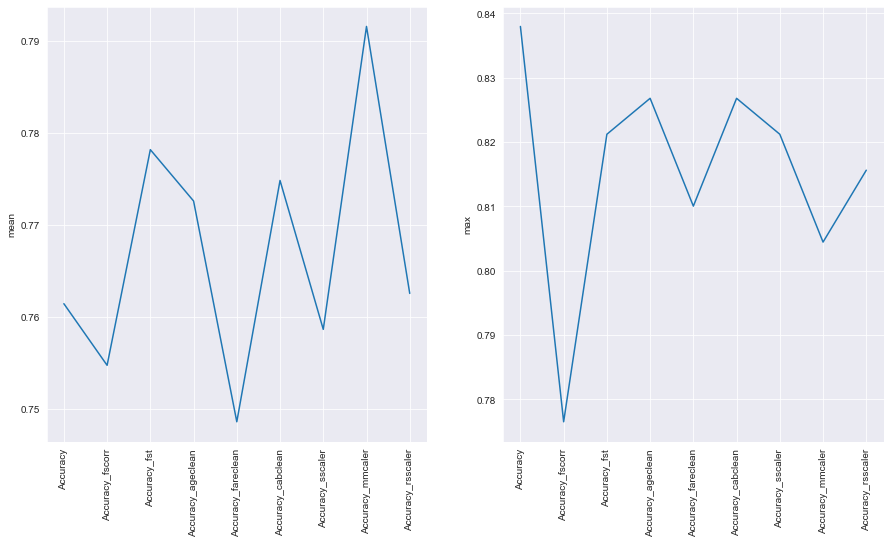

In [79]:
fig =  plt.figure(figsize= (15,8))
fig.add_subplot(1,2,1)
GraphScores(scores, 'mean')
fig.add_subplot(1,2,2)
GraphScores(scores, 'max')

We'll be using minmaxscaler as it gave the best results.

# Parameter Tuning

In [80]:
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle = True)

In [290]:
X_train, X_test, y_train, y_test = train_test_split(df_unscaled[['Fare',
                                                    'Age',
                                                    'Name_ Mr',
                                                    'Pclass',
                                                    'Sex_male',
                                                    'Sex_female',
                                                    'Cabin',
                                                    'SibSp',
                                                    'Name_ Mrs',
                                                    'Parch',
                                                    'Name_ Miss']],
                                                    y_final,
                                                    train_size = 0.8,
                                                    stratify = y_final,
                                                    random_state =  42)
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [82]:
#preliminary classifiers without parameter tuning.
SGD = SGDClassifier(random_state= 42)
LR  = LogisticRegression(random_state= 42)
KNN = KNeighborsClassifier()
GNBfinal = GaussianNB() #no params to tune
XGB = XGBClassifier(random_state= 42)
RFC = RandomForestClassifier(random_state= 42)
DTC = DecisionTreeClassifier(random_state= 42)
ADA = AdaBoostClassifier(random_state= 42)
XTC = ExtraTreesClassifier(random_state= 42)
GBC = GradientBoostingClassifier(random_state= 42)

In [89]:
#SGD optimization
params_grid ={'loss': ['log','modified_huber'],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'alpha': [0.0002, 0.0003,0.0004]
              }
optimal_params = GridSearchCV(SGD, 
                              param_grid=params_grid, 
                              verbose =  2, 
                              cv = kfold, 
                              n_jobs=-1)

In [90]:
best_params = optimal_params.fit(X_train,  y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.5s finished


In [91]:
sgdparams =  best_params.best_params_
sgdparams

{'alpha': 0.0003, 'loss': 'log', 'penalty': 'elasticnet'}

In [94]:
SGDfinal = SGDClassifier(**sgdparams, random_state= 42)
SGDfinal.fit(X_train,  y_train)
y_pred = SGDfinal.predict(X_test) 

In [95]:
accuracy_score(y_test, y_pred)

0.8100558659217877

In [108]:
#LR optimization
params_grid ={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty': ['l2', 'l1', 'elasticnet', 'none'],
              'multi_class': ['auto', 'ovr', 'multinomial'],
              'C' : [3,4,5]
              }
optimal_params = GridSearchCV(LR, 
                              param_grid=params_grid, 
                              verbose =  2, 
                              cv = kfold, 
                              n_jobs=-1)

In [109]:
best_params = optimal_params.fit(X_train,  y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    4.9s finished


In [110]:
lrparams =  best_params.best_params_
lrparams

{'C': 3, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}

In [131]:
LRfinal = LogisticRegression(#**lrparams, 
                             random_state= 42)
LRfinal.fit(X_train,  y_train)
y_pred = LRfinal.predict(X_test) 

In [132]:
accuracy_score(y_test, y_pred)

0.8044692737430168

In [133]:
#KNN optimization
params_grid ={'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
              }
optimal_params = GridSearchCV(KNN, 
                              param_grid=params_grid, 
                              verbose =  2, 
                              cv = kfold, 
                              n_jobs=-1)

In [139]:
best_params = optimal_params.fit(X_train,  y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


In [140]:
knnparams =  best_params.best_params_
knnparams

{'n_neighbors': 5}

In [141]:
KNNfinal = KNeighborsClassifier(**knnparams)
KNNfinal.fit(X_train,  y_train)
y_pred = KNNfinal.predict(X_test) 

In [142]:
accuracy_score(y_test, y_pred)

0.776536312849162

In [152]:
#parameter tuning with  XGB (done)
params_grid ={'max_depth': [5,6,7],
              'learning_rate': [0.04,0.05,0.06],
              'gamma': [0],
              'reg_lambda': [0],
              'scale_pos_weight': [1],
              'random_state' : [42],
              'subsample' : [0.9],
              'colsample_bytree' : [0.5]
              }
optimal_params = GridSearchCV(XGB, 
                              param_grid=params_grid, 
                              verbose =  2, 
                              cv = kfold, 
                              n_jobs=-1)

In [153]:
best_params = optimal_params.fit(X_train,  y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished


In [154]:
xgbparams =  best_params.best_params_
xgbparams

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'random_state': 42,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.9}

In [155]:
XGBfinal = XGBClassifier(**xgbparams, random_state = 42)
XGBfinal.fit(X_train,  y_train)
y_pred = XGBfinal.predict(X_test) 

In [156]:
accuracy_score(y_test, y_pred)

0.8100558659217877

In [163]:
#RFC tuning
params_grid ={'max_features': ['auto'],
              'n_estimators': [300,350,400,450,500],
              'criterion': ['gini'],
              'min_samples_split': [7,8,9]
              }
optimal_params = GridSearchCV(RFC, 
                              param_grid=params_grid, 
                              verbose =  2, 
                              cv = kfold, 
                              n_jobs=-1)

In [164]:
best_params = optimal_params.fit(X_train,  y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   38.6s finished


In [165]:
rfcparams =  best_params.best_params_
rfcparams

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 450}

In [173]:
RFCfinal = RandomForestClassifier(#**rfcparams,
                                  random_state = 42)
RFCfinal.fit(X_train,  y_train)
y_pred = RFCfinal.predict(X_test) 

In [175]:
accuracy_score(y_test, y_pred)

0.7988826815642458

In [179]:
#DTC Tuning
params_grid ={'max_depth': [3,4,5,6,7,8,9,'None'],
              'min_samples_leaf': [1,2,3,4,5,6],
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2']
              }
optimal_params = GridSearchCV(DTC, 
                              param_grid=params_grid, 
                              verbose =  2, 
                              cv = kfold, 
                              n_jobs=-1)

In [180]:
best_params = optimal_params.fit(X_train,  y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:    3.0s finished


In [181]:
dtcparams =  best_params.best_params_
dtcparams

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 3}

In [182]:
DTCfinal = DecisionTreeClassifier(**dtcparams, random_state = 42)
DTCfinal.fit(X_train,  y_train)
y_pred = DTCfinal.predict(X_test) 

In [183]:
accuracy_score(y_test, y_pred)

0.7988826815642458

In [184]:
#ADAboost tuning
params_grid ={'learning_rate' : [0.01,.05,.1,.5,1], 
              'n_estimators' : [50,100,150,200,250,300]
              }
optimal_params = GridSearchCV(ADA, 
                              param_grid=params_grid, 
                              verbose =  2, 
                              cv = kfold, 
                              n_jobs=-1)

In [185]:
best_params = optimal_params.fit(X_train,  y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   32.0s finished


In [186]:
adaparams =  best_params.best_params_
adaparams

{'learning_rate': 0.05, 'n_estimators': 150}

In [188]:
ADAfinal = AdaBoostClassifier(**adaparams, random_state = 42)
ADAfinal.fit(X_train,  y_train)
y_pred = ADAfinal.predict(X_test) 

In [189]:
accuracy_score(y_test, y_pred)

0.8044692737430168

In [193]:
#XTCboost tuning
params_grid ={'n_estimators': [100,200,300,400],
              'criterion': ['gini'],
              'max_depth': [5,6,7,8,'None'],
              'max_features': ['auto'],
              'bootstrap': ['True']
              }
optimal_params = GridSearchCV(XTC, 
                              param_grid=params_grid, 
                              verbose =  2, 
                              cv = kfold, 
                              n_jobs=-1)

In [194]:
best_params = optimal_params.fit(X_train,  y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   19.0s finished


In [195]:
xtcparams =  best_params.best_params_
xtcparams

{'bootstrap': 'True',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [196]:
XTCfinal = ExtraTreesClassifier(**xtcparams, random_state = 42)
XTCfinal.fit(X_train,  y_train)
y_pred = XTCfinal.predict(X_test) 

In [197]:
accuracy_score(y_test, y_pred)

0.8044692737430168

In [204]:
#GBCboost tuning
params_grid ={'learning_rate': [0.04,0.05,0.06], 
              'n_estimators' : [300,350,400,500,600,700,800]
              }
optimal_params = GridSearchCV(GBC, 
                              param_grid=params_grid, 
                              verbose =  2, 
                              cv = kfold, 
                              n_jobs=-1)

In [205]:
best_params = optimal_params.fit(X_train,  y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   37.4s finished


In [206]:
gbcparams =  best_params.best_params_
gbcparams

{'learning_rate': 0.04, 'n_estimators': 400}

In [209]:
GBCfinal = GradientBoostingClassifier(#**gbcparams,  
                                      random_state  =  42)
GBCfinal.fit(X_train,  y_train)
y_pred = GBCfinal.predict(X_test) 

In [210]:
accuracy_score(y_test, y_pred)

0.8044692737430168

ENSEMBLING MODELS


In [308]:
#models
final_models = [('SGDfinal', SGDClassifier(**sgdparams, random_state= 42)),
                ('KNNfinal', KNeighborsClassifier(**knnparams)),
                ('GNBfinal', GaussianNB()),
                #('XGBfinal', XGBClassifier(**xgbparams)),
                #('RFCfinal', RandomForestClassifier(**rfcparams,  random_state  =  42)),
                ('DTCfinal', DecisionTreeClassifier(**dtcparams,  random_state  =  42)),
                ('ADAfinal', AdaBoostClassifier(**adaparams,  random_state  =  42)),
                #('XTCfinal', ExtraTreesClassifier(**xtcparams,  random_state  =  42)),
                ('GBCfinal', GradientBoostingClassifier(**gbcparams,  random_state  =  42))]
ensemble = VotingClassifier(final_models,  voting = 'soft')

In [309]:
results = cross_val_score(ensemble, X_train, y_train, scoring =  'accuracy', cv=kfold)
print('Accuracy on train:',results.mean())
ensemble_model = ensemble.fit(X_train,y_train)
pred = ensemble_model.predict(X_test)
print('Accuracy on test:' , (y_test == pred).mean())

Accuracy on train: 0.8202073552425665
Accuracy on test: 0.8156424581005587


In [310]:
#create  dataframe of probabilities
def ModelProbaDF(model_list, xtrain, ytrain, xtest, ytest):
    cols = [x[0]  for  x in  model_list]
    df  =  pd.DataFrame(index = range(len(y_test)))
    for x in model_list:
        x[1].fit(xtrain, ytrain)
        df[x[0]]= x[1].predict_proba(xtest)[:,0]
    return df

In [311]:
corr_table = ModelProbaDF(final_models,X_train,y_train,X_test,y_test)

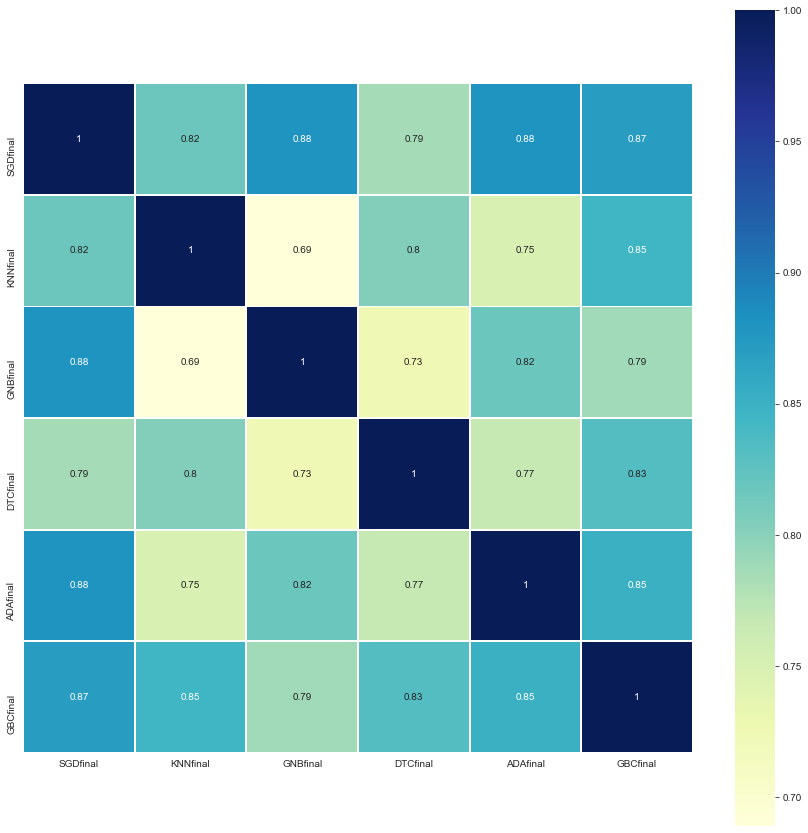

In [312]:
plt.figure(figsize= (15,15))
sns.heatmap(corr_table.corr(),
            #mask= corr_table.corr() <0.8,
            cmap="YlGnBu",
            linewidths = 1,
            square = True,
            annot=True)

In [313]:
#we'll use this to disable redundant models and hopefully get a  better score
correl = corr_table.corr()
correl[(correl > 0.9 )& (correl != 1)].stack()

Series([], dtype: float64)

Final Training Data

In [314]:
X = MinMaxScaler().fit_transform(df_unscaled.drop(columns = 'Survived'))
y = y_final

In [317]:
#preprocessing todo on test test:
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace = True)
test['Embarked'].fillna(test['Embarked'].value_counts().index[0],  inplace = True)
test['Name'] = (test['Name'].str.split(',',  n =1, expand=True))[1]
test['Name'] = (test['Name'].str.split('.',  n =1, expand=True))[0]

#drop  ticket column,  i feel its  irrelevant and whatever trend it shows is  coincidence.
test  = test.drop('Ticket',  axis =1)
test  = pd.get_dummies(test,  columns= ['Sex','Embarked','Name'])
test['Cabin'] = test['Cabin'].str[0:1]
test['Cabin'].fillna('U',  inplace = True)
cabinValues = {'U':0,'G':1,'F':2, 'E':3,'D':4,'T':5,'C':6,'B':7,'A':8}
test['Cabin'] = test['Cabin'].map(cabinValues)

feature_trees1 = ['Fare',
 'Age',
 'Name_ Mr',
 'Pclass',
 'Sex_male',
 'Sex_female',
 'Cabin',
 'SibSp',
 'Name_ Mrs',
 'Parch',
 'Name_ Miss'
         ]
X_test = MinMaxScaler().fit_transform(test[feature_trees1])

In [319]:
X_test 

array([[0.01528158, 0.4527232 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01366309, 0.61756561, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01890874, 0.8153765 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01415106, 0.50547277, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01571255, 0.39697468, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0436405 , 0.39697468, 0.        , ..., 0.        , 0.11111111,
        0.        ]])

In [320]:
ensemble.fit(X,y)

VotingClassifier(estimators=[('SGDfinal',
                              SGDClassifier(alpha=0.0003, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='elasticnet',
                                            power_t=0.5, random_state=42,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1...
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=

In [321]:
output =  ensemble.predict(X_test)

In [322]:
output = pd.DataFrame(data = {'PassengerId': test.index,
                       'Survived': output})
output.to_csv('C:\\Users\\Renz\\Desktop\\Data Science\\Python stuff\\Titanic Dataset\\submission.csv', index=False)

In [323]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Including Surnames  gave us  worse predictions (75%)

Without surname: 77%

In [ ]:
X.head()